In [ ]:
%matplotlib inline
import collections
import pandas
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 新增區段

Basic Feature Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pandas.read_csv('/content/drive/MyDrive/content/diplomacy_cv.csv')
corpus = [row['text'] for (index,row) in data.iterrows()]

vectoriser = CountVectorizer()
vectors = vectoriser.fit_transform(corpus)
X = pandas.DataFrame(vectors.toarray(), columns=vectoriser.vocabulary_).values.tolist()
y = numpy.array([int(row['intent']) for (index,row) in data.iterrows()])
print(y)

[0 1 0 ... 0 0 0]


In [ ]:
numTrain = int(len(corpus)*0.8)   # number of training instances
numTest = len(corpus) - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]
print(len(X_train), len(X_test))

1276 320


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Fit regression model to the training set
# regr.fit(X_train, y_train)

Regular Logistic Regression

In [ ]:


#### Implement the Regular Logistic Regression model, i.e., without any regularization. ####
#Regular Logistic Regression
#### Implement the Regular Logistic Regression model, i.e., without any regularization. ####
#Regular Logistic Regression

regular = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000) # Changed 'none' to None
regular.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

Ridge Logistic Regression

In [ ]:
#### Implement the Ridge Logistic Regression model, i.e., with Ridge regularization.     ####
ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)  # 使用 'lbfgs' 或其他支援 L2 正則化的 solver
ridge.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Lasso Logistic Regression

In [ ]:
#### Implement the Lasso Logistic Regression model, i.e., with Lasso regularization.     ####
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)  # 使用 'liblinear' 或其他支援 L1 正則化的 solver
lasso.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

Plotting Template for Part II Question (1)

,Model,Train error,Test error,Sum of Absolute Weights,Name
0,"LogisticRegression(max_iter=1000, penalty=None)",0.079181,0.707107,[36110.16286304322],Regular
1,LogisticRegression(max_iter=1000),0.259611,0.651920,[587.7347059116553],Ridge
2,"LogisticRegression(max_iter=1000, penalty='l1'...",0.409526,0.684653,[147.48870916706267],Lasso


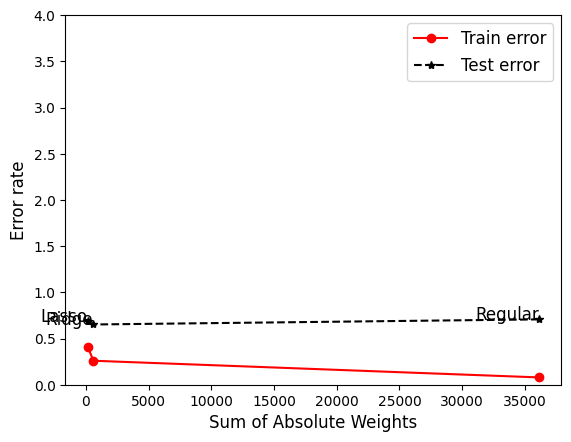

In [ ]:
#### Training/Testing Error Rate Comparison over Sum of Absolute Weights       ####
#### Training/Testing Error Rate Comparison over Sum of Absolute Weights       ####

# Predict using the trained models
y_pred_train_regular = regular.predict(X_train)
y_pred_test_regular = regular.predict(X_test)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights', 'Name']

values1 = [ regular, numpy.sqrt(mean_squared_error(y_train, y_pred_train_regular)),
           numpy.sqrt(mean_squared_error(y_test, y_pred_test_regular)),
           numpy.absolute(regular.coef_).sum() + numpy.absolute(regular.intercept_), 'Regular']

values2 = [ ridge, numpy.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),
           numpy.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           numpy.absolute(ridge.coef_).sum() + numpy.absolute(ridge.intercept_), 'Ridge']

values3 = [ lasso, numpy.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
           numpy.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           numpy.absolute(lasso.coef_).sum() + numpy.absolute(lasso.intercept_), 'Lasso']


results = pandas.DataFrame([values1, values2, values3], columns=columns)

import matplotlib.pyplot as plt
plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')

# Annotate points with the 'Name' column
for i in range(len(results)):
    plt.text(results['Sum of Absolute Weights'][i], results['Test error'][i],
             results['Name'][i], fontsize=12, ha='right')

plt.legend(['Train error', 'Test error'], fontsize=12)
plt.ylim(0, 4)
plt.xlabel('Sum of Absolute Weights', fontsize=12)
plt.ylabel('Error rate', fontsize=12)
plt.savefig('./A2_partII_q1.png')

results


# 新增區段

Plotting Template for Part II Question (3)

,Model,Train error,Test error,Sum of Absolute Weights,Name
0,"LogisticRegression(C=1000.0, max_iter=1000, pe...",0.079181,0.691466,[6511.620842937239],$\lambda$ = 0.001
1,"LogisticRegression(C=100.0, max_iter=1000, pen...",0.079181,0.695971,[3721.620470494053],$\lambda$ = 0.01
2,"LogisticRegression(C=10.0, max_iter=1000, pena...",0.134258,0.656696,[1486.7277233268285],$\lambda$ = 0.1
3,"LogisticRegression(max_iter=1000, penalty='l1'...",0.409526,0.684653,[147.4896357590933],$\lambda$ = 1


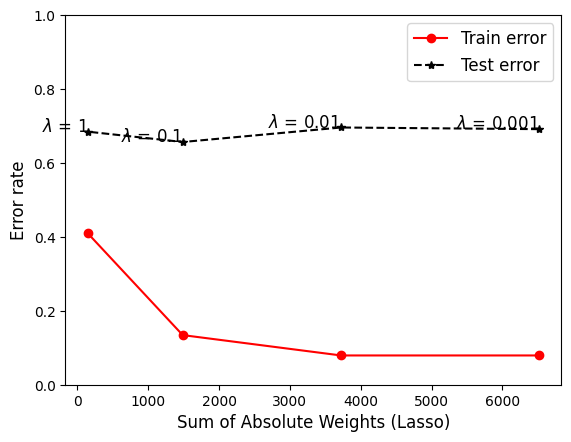

In [ ]:
# ... (前面的程式碼保持不變)

# Plotting Template for Part II Question (3)
# %%
# 以下是修改後的程式碼，替換原始程式碼區塊中的程式碼：
from sklearn.linear_model import LogisticRegression

lambda_values = [0.001, 0.01, 0.1, 1]  # 使用更大範圍的 lambda 值

results_data = []
for lambda_val in lambda_values:
    lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=1/lambda_val)
    lasso.fit(X_train, y_train)
    y_pred_train_lasso = lasso.predict(X_train)
    y_pred_test_lasso = lasso.predict(X_test)

    # ... (計算誤差和權重絕對值總和，與之前程式碼相同)

    results_data.append([lasso,
                        numpy.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
                        numpy.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
                        numpy.absolute(lasso.coef_).sum() + numpy.absolute(lasso.intercept_),
                        r'$\lambda$ = ' + str(lambda_val)])

results = pandas.DataFrame(results_data, columns=columns)

import matplotlib.pyplot as plt
plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')

# Annotate points with the 'Name' column
for i in range(len(results)):
    plt.text(results['Sum of Absolute Weights'][i]+0.001, results['Test error'][i]+0.0003,
             results['Name'][i], fontsize=12, ha='right')

plt.legend(['Train error', 'Test error'], fontsize=12)
plt.ylim(0, 1)  # 使用更大範圍的 Y 軸
plt.xlabel('Sum of Absolute Weights (Lasso)', fontsize=12)
plt.ylabel('Error rate', fontsize=12)
plt.savefig('./A2_partII_q3.png')

results
# ... (後面的程式碼保持不變)

# 新增區段

In [ ]:
def save_conversation(conversation, filename="my_conversation_for_embedding.txt"):
  """Saves a conversation to a text file.

  Args:
    conversation: A list of strings representing the conversation.
    filename: The name of the file to save the conversation to.
  """
  with open(filename, 'w') as f:
    for line in conversation:
      f.write(line + '\n')

conversation_history = []

# 与 Gemini 的互动，并将对话内容添加到 conversation_history 列表中
conversation_history.append("User: 你好")
conversation_history.append("Gemini: 你好")
# ... (其他对话内容)

# 保存对话内容到文件
save_conversation(conversation_history)

In [ ]:
import pickle
# 或
import joblib

# 儲存模型
filename = 'trained_model.sav'  # 設定檔名
pickle.dump(regular, open(filename, 'wb'))  # 使用 pickle 儲存
# 或
joblib.dump(regular, filename)  # 使用 joblib 儲存

# 儲存 vectorizer
filename = 'vectorizer.sav'  # 設定檔名
pickle.dump(vectoriser, open(filename, 'wb'))  # 使用 pickle 儲存
# 或
joblib.dump(vectoriser, filename)  # 使用 joblib 儲存

['vectorizer.sav']